In [1]:
!pip install wurlitzer
!pip install tensorflow 
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, InputLayer, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
import plotly.express as px
import matplotlib.pyplot as plt

#import os  #when import os firstly make deadlock 
#/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.pid, fd = os.forkpty()
import warnings
warnings.filterwarnings('ignore')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


2024-07-27 07:35:00.634723: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 07:35:00.634882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 07:35:00.811895: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#first check availability of internet otherwise will not run properlly 
import requests

try:
    response = requests.get("https://www.google.com/")
    response.raise_for_status()  # Raise an exception for failed requests
    print("Internet connection seems to be working!")
except requests.exceptions.RequestException as e:
    print("Error: Could not connect to the internet.", e)

Internet connection seems to be working!


In [3]:
import os  #when import os firstly make deadlock 
path = "/kaggle/input/tomatoleaf/tomato"
os.listdir(path)

['cnn_train.py', 'val', 'train']

In [4]:
train_path = os.path.join(path, "train")
print(os.listdir(train_path))
print("*"*100)
test_path = os.path.join(path, "val")
print(os.listdir(test_path))

['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']
****************************************************************************************************
['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']


In [5]:
from glob import glob
folders = glob("/kaggle/input/tomatoleaf/tomato/train/*")
folders

['/kaggle/input/tomatoleaf/tomato/train/Tomato___Late_blight',
 '/kaggle/input/tomatoleaf/tomato/train/Tomato___healthy',
 '/kaggle/input/tomatoleaf/tomato/train/Tomato___Early_blight',
 '/kaggle/input/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot',
 '/kaggle/input/tomatoleaf/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/kaggle/input/tomatoleaf/tomato/train/Tomato___Bacterial_spot',
 '/kaggle/input/tomatoleaf/tomato/train/Tomato___Target_Spot',
 '/kaggle/input/tomatoleaf/tomato/train/Tomato___Tomato_mosaic_virus',
 '/kaggle/input/tomatoleaf/tomato/train/Tomato___Leaf_Mold',
 '/kaggle/input/tomatoleaf/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite']

Text(0.5, 1.0, 'Bacterial Spot')

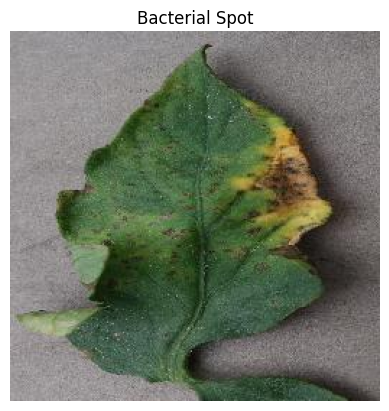

In [6]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/kaggle/input/tomatoleaf/tomato/train/Tomato___Bacterial_spot/05777829-6912-44bb-bcef-901bc5190584___GCREC_Bact.Sp 6150.JPG"))
plt.axis('off')  # Turn off axis
plt.title("Bacterial Spot")

In [7]:
import tensorflow 
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image

In [8]:
SIZE = [128, 128,3]
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [9]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
cnn=Sequential()
# Create a new Sequential model
cnn = models.Sequential()
# First block
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Second block
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Third block
cnn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Fourth block
cnn.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Fifth block
cnn.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten the output of the convolutional base
cnn.add(layers.Flatten())

# Fully connected layers
cnn.add(layers.Dense(1024, activation='relu'))
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(512, activation='relu'))
cnn.add(layers.Dropout(0.5))

# Output layer for classification tasks
# Set the number of units to the number of classes (e.g., 10 for 10 classes)
cnn.add(layers.Dense(10, activation='softmax'))

# Compile the model
#cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])






In [10]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                 

In [11]:
train_datagen_vg19 = ImageDataGenerator(rescale=1./255)

test_datagen_vg19 = ImageDataGenerator(rescale=1./255)

In [12]:
trainning_set_vg19 = train_datagen_vg19.flow_from_directory(train_path,
                                                 target_size=(128, 128),
                                                 batch_size=30,
                                                 class_mode="categorical", shuffle=True)

Found 10000 images belonging to 10 classes.


In [13]:
testing_set_vg19 = test_datagen_vg19.flow_from_directory(test_path,
                                                 target_size=(128, 128),
                                                 batch_size=30,
                                                 class_mode="categorical", shuffle=False)

Found 1000 images belonging to 10 classes.


In [14]:
from tensorflow.keras.optimizers import Adam

# Specify the desired learning rate (e.g., 0.001)
learning_rate = 1e-4  # You can adjust the value as needed

# Create an instance of the Adam optimizer with the specified learning rate
adam_optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the desired optimizer, loss function, and metrics
cnn.compile(loss="categorical_crossentropy",
                metrics=["accuracy"],
                optimizer=adam_optimizer)

In [15]:
# Define your callbacks
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5 , restore_best_weights=True)

# Train the model using the fit method
r_vg19 = cnn.fit(trainning_set_vg19,
                       validation_data=testing_set_vg19,
                       epochs=50,
                       callbacks=[callback])

Epoch 1/50
334/334 [==============================] - 1307s 4s/step - loss: 2.1989 - accuracy: 0.1436 - val_loss: 1.7733 - val_accuracy: 0.2670
Epoch 2/50
334/334 [==============================] - 1300s 4s/step - loss: 1.5125 - accuracy: 0.4443 - val_loss: 1.2332 - val_accuracy: 0.5550
Epoch 3/50
334/334 [==============================] - 1293s 4s/step - loss: 1.1231 - accuracy: 0.6043 - val_loss: 0.9783 - val_accuracy: 0.6580
Epoch 4/50
334/334 [==============================] - 1302s 4s/step - loss: 0.8810 - accuracy: 0.6884 - val_loss: 0.8287 - val_accuracy: 0.7330
Epoch 5/50
334/334 [==============================] - 1305s 4s/step - loss: 0.6968 - accuracy: 0.7545 - val_loss: 0.5930 - val_accuracy: 0.7940
Epoch 6/50
334/334 [==============================] - 1297s 4s/step - loss: 0.5593 - accuracy: 0.8088 - val_loss: 0.5093 - val_accuracy: 0.8190
Epoch 7/50
334/334 [==============================] - 1294s 4s/step - loss: 0.4737 - accuracy: 0.8406 - val_loss: 0.5674 - val_accuracy:

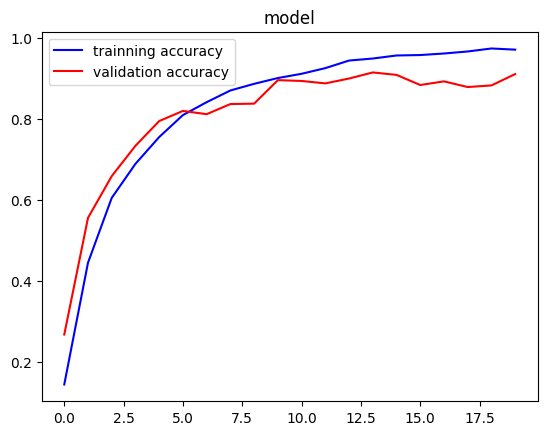

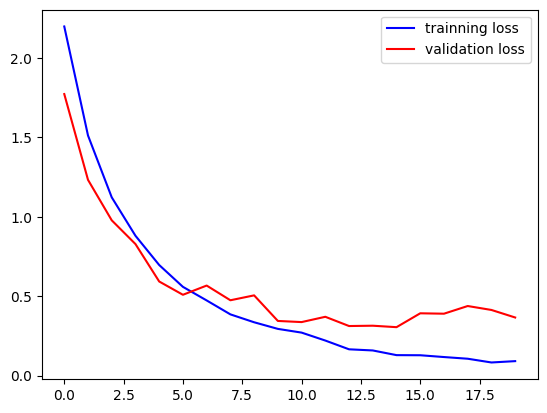

In [16]:
import matplotlib.pyplot as plt
accuracy = r_vg19.history['accuracy']
val_accuracy = r_vg19.history['val_accuracy']
loss = r_vg19.history['loss']
val_loss = r_vg19.history['val_loss']
epochs = range(len(accuracy))
plt.title("model")
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()
#cnn.save('Leaf_Life_model')


In [17]:
y_pred = cnn.predict(testing_set_vg19)
y_pred

34/34 [==============================] - 35s 1s/step


array([[9.9995202e-01, 4.5216882e-05, 2.7236663e-07, ..., 2.0287152e-06,
        2.3654806e-10, 2.2935490e-08],
       [9.9949557e-01, 3.0293144e-04, 5.8966241e-05, ..., 1.0115569e-04,
        1.1447523e-07, 3.8182529e-06],
       [9.9999088e-01, 8.0183991e-06, 6.3844958e-08, ..., 6.9097308e-07,
        4.8612406e-11, 7.9363298e-09],
       ...,
       [6.0300250e-04, 2.6942440e-03, 8.2835518e-03, ..., 2.7834583e-04,
        5.7976745e-04, 9.3570000e-01],
       [7.9389203e-05, 3.9409031e-04, 4.2352360e-04, ..., 4.7681635e-05,
        5.3753378e-04, 9.8103207e-01],
       [1.4369488e-03, 6.3336338e-04, 9.0579102e-03, ..., 5.8149544e-05,
        9.4482035e-05, 9.8478043e-01]], dtype=float32)

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 6, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 6, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 5, 1, 1, 1, 4,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 4, 3,

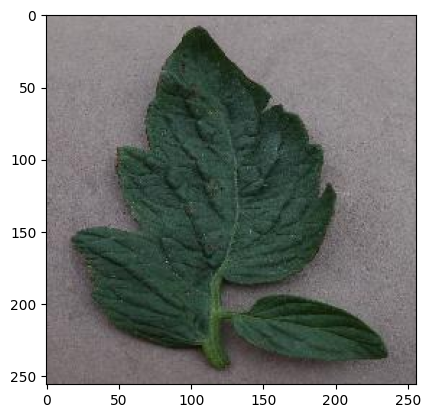

In [19]:
test_img = plt.imread("/kaggle/input/tomatoleaf/tomato/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG")
plt.imshow(test_img)
cnn.save("vgg_19tl.model")

In [20]:
#import cv2
#import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (128, 128))
    return new_array.reshape(-1, 128, 128, 3)

model = tf.keras.models.load_model("vgg_19tl.model")

In [21]:
class_dict = trainning_set_vg19.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [22]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction) == clss:
            return key

In [23]:
import cv2
prediction = model.predict([prepare("/kaggle/input/tomatoleaf/tomato/val/Tomato___healthy/1b966d62-d5c3-4a67-ba36-b67d873ccfdf___GH_HL Leaf 440.JPG")])
prediction_cls(prediction)

1/1 [==============================] - 0s 235ms/step


'Tomato___Early_blight'

In [24]:
prediction = model.predict([prepare("/kaggle/input/tomatoleaf/tomato/val/Tomato___Leaf_Mold/0ba88812-fa4f-4602-bcec-c03cd7d0ba2b___Crnl_L.Mold 6990.JPG")])

prediction_cls(prediction)

1/1 [==============================] - 0s 65ms/step


'Tomato___Leaf_Mold'

In [25]:
# Specify the path to save the model
model_path = '/kaggle/working/smartLeaf.h5'

# Save the model
cnn.save(model_path)


In [26]:
#import tensorflow as tf
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#converter.optimizations = [tf.lite.Optimize.DEFAULT]
#tflite_model = converter.convert()
#tflite_model_save_path = "/kaggle/working/model.tflite"

# Save the TensorFlow Lite model to the specified path
#with open(tflite_model_save_path, "wb") as f:
#    f.write(tflite_model)